# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.


### Инструкция по выполнению проекта

#### Загрузите и подготовьте данные. Поясните порядок действий.    

##### Обучите и проверьте модель для каждого региона:      
2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.   
2.2. Обучите модель и сделайте предсказания на валидационной выборке.   
2.3. Сохраните предсказания и правильные ответы на валидационной выборке.    
2.4. Напечатайте на экране средний запас сырья и RMSE модели.    
2.5. Проанализируйте результаты.         

#### Подготовьтесь к расчёту прибыли:
3.1. Сохраните в коде все ключевые значения для расчётов.     
3.2. Посчитайте минимальный средний объём сырья в месторождениях региона, достаточный для его разработки. Напишите выводы.    
3.3. Напишите функцию для расчёта прибыли по набору отобранных месторождений и предсказаний модели.    

#### Посчитайте риски и прибыль для каждого региона:      
4.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.   
4.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков.   
4.3. Напишите выводы: предложите регион для разработки месторождений и обоснуйте выбор.           

#### Описание данных
Данные геологоразведки трёх регионов находятся в файлах: geo_data_0.csv, geo_data_1.csv и geo_data_2.csv.         

id — уникальный идентификатор месторождения;    

f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);    

product — объём запасов в месторождении (тыс. баррелей).   


# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st

In [2]:
df_one = pd.read_csv('/datasets/geo_data_0.csv')
df_two = pd.read_csv('/datasets/geo_data_1.csv')
df_three = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
#df_one.to_csv('geo_data_0.csv')

In [4]:
#df_one.to_csv('geo_data_1.csv')

In [5]:
#df_one.to_csv('geo_data_2.csv')

### Поиск пропусков

In [6]:
def missing_data(data):  # функция для поиска пропусков
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

In [7]:
df_one.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [8]:
missing_data(df_one) 

,Total,Percent
product,0,0.0
f2,0,0.0
f1,0,0.0
f0,0,0.0
id,0,0.0


In [9]:
df_two.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
missing_data(df_two) 

,Total,Percent
product,0,0.0
f2,0,0.0
f1,0,0.0
f0,0,0.0
id,0,0.0


In [11]:
df_three.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
missing_data(df_three) 

,Total,Percent
product,0,0.0
f2,0,0.0
f1,0,0.0
f0,0,0.0
id,0,0.0


In [13]:
for i in [df_one, df_two, df_three]:
    i.info()
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3

Ни в одном датасете пропуски не найдены

### Поиск дубликатов

In [14]:
df_one.duplicated().sum()

0

In [15]:
df_two.duplicated().sum()

0

In [16]:
df_three.duplicated().sum()

0

In [17]:
def find_duplicates_by_columns(df):  # функция для поиска дубликатов по столбцам
    for i in df.columns:
        duplicates = df[i].duplicated().sum()
        print('Количество повторов в столбце {} равно {}'.format(i, duplicates))

In [18]:
find_duplicates_by_columns(df_one)

Количество повторов в столбце id равно 10
Количество повторов в столбце f0 равно 0
Количество повторов в столбце f1 равно 0
Количество повторов в столбце f2 равно 0
Количество повторов в столбце product равно 0


In [19]:
df_one['id'] = df_one['id'].drop_duplicates().reset_index(drop
= True)

In [20]:
df_one = df_one.dropna()

In [21]:
find_duplicates_by_columns(df_one)

Количество повторов в столбце id равно 0
Количество повторов в столбце f0 равно 0
Количество повторов в столбце f1 равно 0
Количество повторов в столбце f2 равно 0
Количество повторов в столбце product равно 0


In [22]:
find_duplicates_by_columns(df_two)

Количество повторов в столбце id равно 4
Количество повторов в столбце f0 равно 0
Количество повторов в столбце f1 равно 0
Количество повторов в столбце f2 равно 0
Количество повторов в столбце product равно 99988


In [23]:
df_two['id'] = df_two['id'].drop_duplicates().reset_index(drop
= True)

In [24]:
df_two = df_two.dropna()

In [25]:
find_duplicates_by_columns(df_two)

Количество повторов в столбце id равно 0
Количество повторов в столбце f0 равно 0
Количество повторов в столбце f1 равно 0
Количество повторов в столбце f2 равно 0
Количество повторов в столбце product равно 99984


Во втором датасете почти для каждого значения стобца product соответствет дубликат, при том что значения остальных для всех строк во втором датасете разные, в том числе и id. Очевидно это аномалия. Удалять дубликаты в product не буду т.к. это уникальная особенность датасета 2. 

In [26]:
find_duplicates_by_columns(df_three)

Количество повторов в столбце id равно 4
Количество повторов в столбце f0 равно 0
Количество повторов в столбце f1 равно 0
Количество повторов в столбце f2 равно 0
Количество повторов в столбце product равно 0


In [27]:
df_three['id'] = df_three['id'].drop_duplicates().reset_index(drop
= True)

In [28]:
df_three = df_three.dropna()

In [29]:
find_duplicates_by_columns(df_three)

Количество повторов в столбце id равно 0
Количество повторов в столбце f0 равно 0
Количество повторов в столбце f1 равно 0
Количество повторов в столбце f2 равно 0
Количество повторов в столбце product равно 0


### Исследование датасетов и установление зависимостей

###### Регион 1

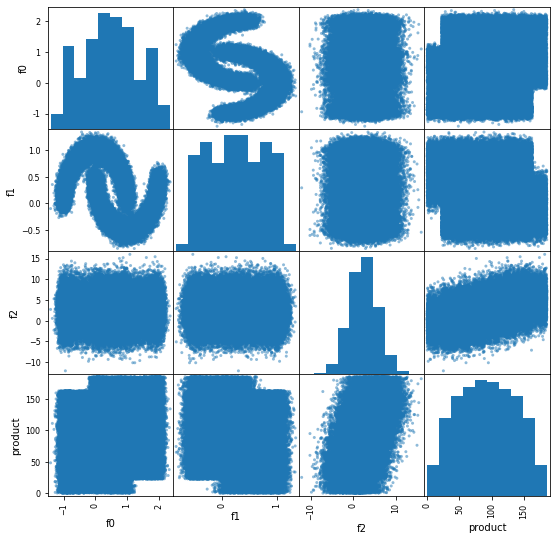

In [30]:
smatrix_one = pd.plotting.scatter_matrix(df_one, figsize=(9, 9))

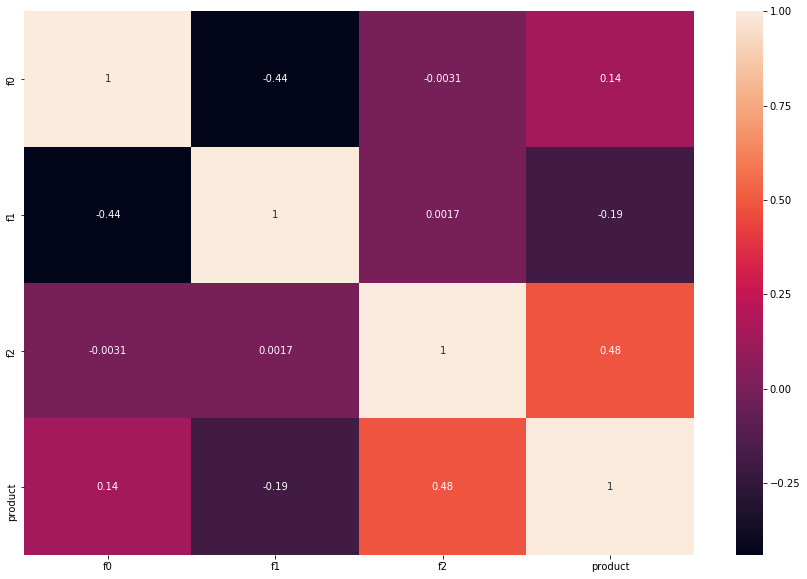

In [31]:
plt.figure(figsize = (15,10))
sns.heatmap(df_one.corr(method = 'pearson'), annot = True)

#### Регион 2

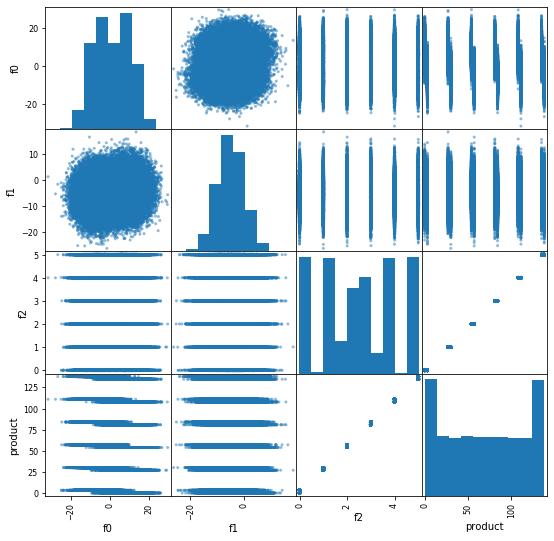

In [32]:
smatrix_two = pd.plotting.scatter_matrix(df_two, figsize=(9, 9))

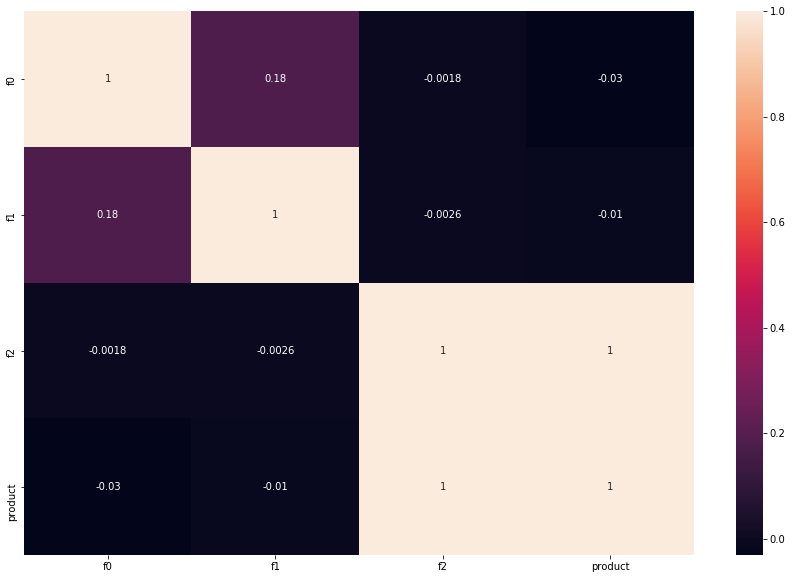

In [33]:
plt.figure(figsize = (15,10))
sns.heatmap(df_two.corr(method = 'pearson'), annot = True)

#### Регион 3

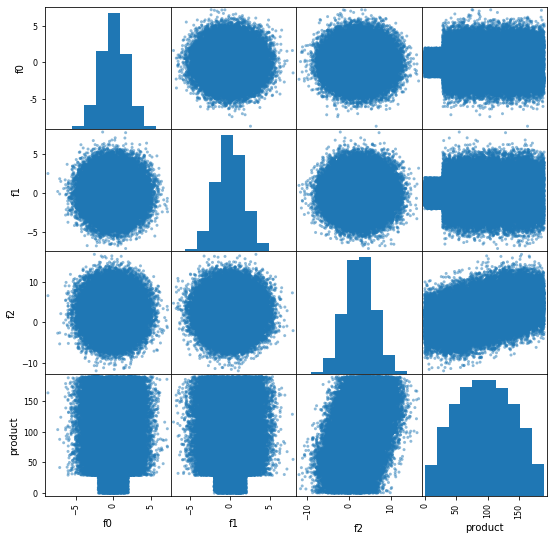

In [34]:
smatrix_three = pd.plotting.scatter_matrix(df_three, figsize=(9, 9))

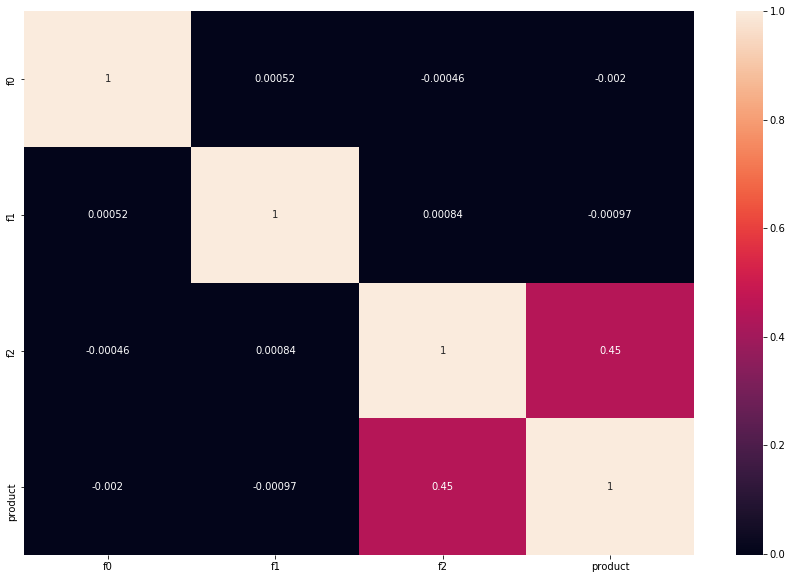

In [35]:
plt.figure(figsize = (15,10))
sns.heatmap(df_three.corr(method = 'pearson'), annot = True)

### Вывод

#### Регион 2
Первое что бросается в глаза - датасет второго региона. Наблюдается прямая зависимость между f2 и product. Признаки f0 и f1 не влияют на product

#### Регион 1 
На значения product больше всего влияет f2 (ощутимся положительная корреляция). f0 и f1 слабо влияют на целевой признак

#### Регион 3
Есть зависимость между f2 и продукт (Коэфф. корреляции Пирсона - 0.45). f0 b f1 на profuct не влияют. 

### Разделение данных на выборки 

В данном случае тестовая выборка является так же и валидационной. Отделя данные на тест я условно считаю их неизвестными, т.к. проект учебный

#### Регион 1


In [36]:
df_one_train, df_one_test = train_test_split(df_one, test_size=0.25, random_state=1234)

In [37]:
df_one_train_features = df_one_train.drop(['id','product'], axis=1)
df_one_train_target = df_one_train['product']

In [38]:
df_one_test_features = df_one_test.drop(['id','product'], axis=1)
df_one_test_target = df_one_test['product']

#### Регион 2

In [39]:
df_two_train, df_two_test = train_test_split(df_two, test_size=0.25, random_state=1234)

In [40]:
df_two_train_features = df_two_train.drop(['id','product'], axis=1)
df_two_train_target = df_two_train['product']

In [41]:
df_two_test_features = df_two_test.drop(['id','product'], axis=1)
df_two_test_target = df_two_test['product']

#### Регион 3


In [42]:
df_three_train, df_three_test = train_test_split(df_three, test_size=0.25, random_state=1234)

In [43]:
df_three_train_features = df_three_train.drop(['id','product'], axis=1)
df_three_train_target = df_three_train['product']

In [44]:
df_three_test_features = df_three_test.drop(['id','product'], axis=1)
df_three_test_target = df_three_test['product']

### Вывод

#### Предобработка
В датасетах пустых значений не обнаружено, строки с повторяющиvbcz Id в каждом датосете были удалины. Повторяющиеся значния столбца product во вторм датасете - аномалия, но удалять их не стал

#### Исследование датасетов и установление зависимостей
Сразу же в глаза бросается второй датасет, где значения product напрямую зависят от f2. Для остальных датасетов между product и
f2 так же наблюдается  ощутимая положительня корреляция, однако не такая сильная.

#### Разделение данных 
Соотношение тренировочной и тестовой выборок 75/25



# 2. Обучение и проверка модели

### Обучение моделей

#### Регион 1

In [45]:
linear_regression_one = LinearRegression()
linear_regression_one.fit(df_one_train_features, df_one_train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
predictions_one =  linear_regression_one.predict(df_one_test_features)

In [47]:
predictions_one

array([62.7122743 , 75.8431005 , 64.18134213, ..., 75.95675562,
       73.64955245, 80.55361773])

In [48]:
#Сохраните предсказания и правильные ответы на валидационной выборке

#### Регион 2

In [49]:
linear_regression_two = LinearRegression()
linear_regression_two.fit(df_two_train_features, df_two_train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
predictions_two =  linear_regression_two.predict(df_two_test_features)

In [51]:
predictions_two

array([136.39410691,  57.17068443, 136.77870549, ...,  57.5355443 ,
        58.42135683,   2.95995893])

In [52]:
#Сохраните предсказания и правильные ответы на валидационной выборке

#### Регион 3

In [53]:
linear_regression_three = LinearRegression()
linear_regression_three.fit(df_three_train_features, df_three_train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
predictions_three =  linear_regression_three.predict(df_three_test_features)

In [55]:
predictions_three

array([ 93.50761906,  57.20462793, 124.56547462, ..., 126.68920525,
       101.59258146,  75.27401364])

In [56]:
#Сохраните предсказания и правильные ответы на валидационной выборке

### Cредний запас сырья и RMSE модели

#### Регион 1

In [57]:
#средний запас сырья
avg_product_one = predictions_one.mean()

In [58]:
avg_product_one

92.59362807000801

In [59]:
mse_one = mean_squared_error(df_one_test_target, predictions_one)

In [60]:
rmse_one = mse_one ** 0.5

In [61]:
rmse_one

37.647164592568316

#### Регион 2

In [62]:
avg_product_two = predictions_two.mean()


In [63]:
avg_product_two

68.99279939534027

In [64]:
mse_two = mean_squared_error(df_two_test_target, predictions_two)

In [65]:
rmse_two = mse_two ** 0.5

In [66]:
rmse_two

0.8884638496776285

#### Регион 3

In [67]:
avg_product_three = predictions_three.mean()

In [68]:
avg_product_three

94.96651927954885

In [69]:
mse_three = mean_squared_error(df_three_test_target, predictions_three)

In [70]:
rmse_three = mse_three ** 0.5

In [71]:
rmse_three

40.19659192449887

### Вывод

#### Обучение моделей
Были обучены три модели линейной регрессии     

#### Cредний запас сырья и RMSE модели  
Наибольший средний запас сырья показала третья модель,её RSME максимальное среди моделей (40.2), т.е. предсказанные значения  сильнее отличаются от реальных. Качество модели второго региона наилучшее (RSME 0.88), я думаю что такая маленькая ошибка обусловлена прямой корреялций product и f2.      

Качество модели первого региона (RSME 37.6) не особо отличается от качества третьей (RSME 40.2).    

Cредний объем запасов:      

Регион 1 - 92,59   (RSME 37.6)     
Регион 2 - 68,99   (RSME 0.88)     
Регион 3 - 94,96   (RSME 40.2)      

Предположительно больше всего сырья в Регионе 3    

# 3. Подготовка к расчёту прибыли

### Константы для ключевых значений 

In [72]:
#стоимость бурения
COST_OF_DRILLING = 50000000

#количество скважин 
N_WELLS = 200 # 10млрд/50 млн

#прибыль за баррель
PROFIT_PER_BARREL = 4500

### Минимальный средний объём сырья в месторождениях региона, достаточный для его разработки. 

In [73]:
MIN_SUFFICIENT_PRODUCT = COST_OF_DRILLING / PROFIT_PER_BARREL

In [74]:
MIN_SUFFICIENT_PRODUCT

11111.111111111111

### Расчёт прибыли по набору отобранных месторождений и предсказаний модели

Т.к. бюджет позволяет освоить максимум 200 месторождений, в каждом регионе нужно найти сначала 200 меторождений с максимальным объемом запасов, проверить достаточен ли объем каждой из 200 лучших месторождений для разработки (сравнить с min_sufficient_product), а уже от оставшихся посчитать прибыль

Алгоритм:
1. Найти среди месторождений 200  с максимальным объемом запасов
2. Проверить эти 200 лучших месторождений на "достаточность" сырья
3. Расчитать прибыль от оставшихся месторождений региона

In [75]:
def profit_count(predictions):
    sorted_predictions =  sorted(predictions, reverse = True)
    best = sorted_predictions[0:N_WELLS]   #лучшие 200 месторождений
    suitable_wells = [] 
    for i in best:
        if (i * 1000) > MIN_SUFFICIENT_PRODUCT:
            suitable_wells.append(i)
    profit = 0
    for j in suitable_wells:
        profit_per_well = j * 1000 * PROFIT_PER_BARREL - 50000000 
        profit += profit_per_well
    
    return profit

# 4. Расчёт прибыли и рисков 

### Регион 1

In [80]:
def bootstrap(predictions):  # функция для бутстрпара
    
    state = np.random.RandomState(12345)

    values = []
    for i in range(1000):
        series_predictions = pd.Series(predictions)
        predictions_subsample = series_predictions.sample(n = 500, random_state = state, replace = True)
    
        values.append(profit_count(predictions_subsample))

    values = pd.Series(values)
    return values


Распределение приыбли для первого региона :

In [81]:
values_one = bootstrap(predictions_one)

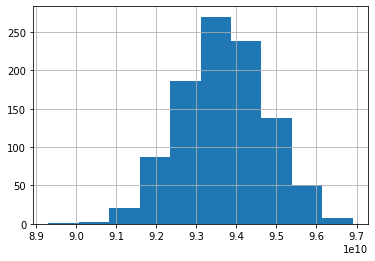

In [82]:
values_one.hist()

Средняя прибыль распределена между 180 и 185 млрдю р 

#### Средняя прибыль : 

In [83]:

values_one.mean()

93687672156.66583

#### Подсчет доверительно интервала для среднего 

Так как дисперсия ген совокупности условно нам не известна, то распределение описывается не Нормальным распределением, а распределением Стьюдента, поэтому используется квантели распределения Стюдента

In [84]:
confidence_interval_one = st.t.interval(0.95, len(values_one)-1, values_one.mean(), values_one.sem())

In [85]:
confidence_interval_one

(93621330393.90186, 93754013919.42981)

#### Расчет рисков 

Под убытками буду подразумевать ситуацию, когда приыбль отрицательна или равна нулю. Требование по условию - вероятность убытков не выше 2.5% 

In [86]:
count = 0
for i in values_one:
    if i <= 0 :
        count +=1
print(count)        

0


Во всех случаях прибыль > 0 => риск убытков нулевой

### Регион 2

In [87]:
values_two = bootstrap(predictions_two)

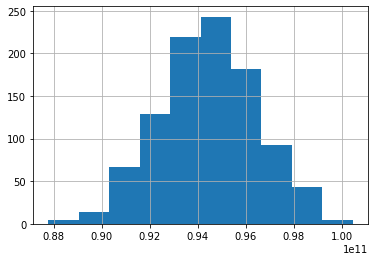

In [88]:
values_two.hist()

#### Средняя прибыль

In [89]:
values_two.mean()

94438521040.46017

#### Подсчет доверительно интервала для среднего 

Так как дисперсия ген совокупности условно нам не известна, то распределение описывается не Нормальным распределением, а распределением Стьюдента, поэтому используется квантели распределения Стюдента

In [90]:
confidence_interval_two = st.t.interval(0.95, len(values_two)-1, values_two.mean(), values_two.sem())

In [91]:
confidence_interval_two

(94311869720.18481, 94565172360.73553)

#### Расчет рисков 

Под убытками буду подразумевать ситуацию, когда приыбль отрицательна или равна нулю. Требование по условию - вероятность убытков не выше 2.5% 

In [92]:
count = 0
for i in values_two:
    if i <= 0 :
        count +=1
print(count)        

0


Во всех случаях прибыль > 0 => риск убытков нулевой

### Регион 3

In [93]:
values_three = bootstrap(predictions_three)

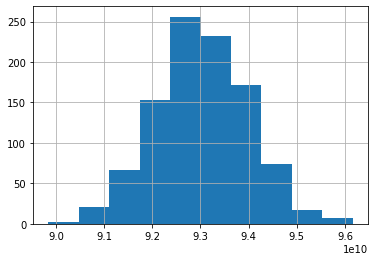

In [94]:
values_three.hist()

#### Средняя прибыль

In [95]:
values_three.mean()

93027812662.79568

#### Подсчет доверительно интервала для среднего 

In [96]:
confidence_interval_three = st.t.interval(0.95, len(values_three)-1, values_three.mean(), values_three.sem())

In [97]:
confidence_interval_three

(92967959658.86435, 93087665666.72702)

#### Расчет рисков 

Под убытками буду подразумевать ситуацию, когда приыбль отрицательна или равна нулю. Требование по условию - вероятность убытков не выше 2.5% 

In [98]:
count = 0
for i in values_three:
    if i <= 0 :
        count +=1
print(count)    

0


Во всех случаях прибыль > 0 => риск убытков нулевой

## Общий вывод   


#### Средняя прибыль:  
Регион 1     93,6   
Регион 2     94,4   
Регион 3     93,0    


#### Доверительный интервал для средней прибыли   
Регион 1      93,6 - 93,7   
Регион 2      94,3 - 94,5   
Регион 3      92,9 - 93,1       


   Средняя прибыль второго региона оказалась самой высокой (около 94,3 млрд рублей) провтив 93,6 и 92,9 млрд рублей для первого и третьего регионов. Однако данные для обучения модели второго региона были аномальные т.е. целевой признак линейно зависил от одного из признаков, а также каждое значение целевого признака (product) имело пару, что тоже очень странно. RSME второй модели была почти нулевой, что тоже настораживает. Если комапния выберет второй регион, имеющий наилучшие показатели прибыли, то может в будущем столкнуться с возможными неопределенностями в связи с аномалиями в данных для обучнния второй модели.   
    
   Риск убытков для всех трех регионов нулевой.
    
   Аномалий в данных для обучения модели первого и второго регионов обнаружено не было. На мой взгляд, предпочтение стоит отдать первому региону, т.к. его предполагаемая средняя прибыль больше третьего примерно на 600 млн. р. и довнрительный интервал для средней прибыли имеет меньший разброс.   